In [1]:
import numpy as np
import requests
import pandas as pd
from my_utils import *
from tqdm import tqdm
tqdm.pandas()

In [2]:
from random import *
import time

In [3]:
api_key = 'RGAPI-67d136a0-7d96-4365-b1ae-0c458fce4e41'

In [4]:
def get_lst(summonerName_lst):
    tmp = []
    for i in summonerName_lst[:5]:
        try:
            puuid = get_puuid(i)
            matchid = get_matchid(puuid, 3)
            matchs_timelines = get_matchs_timelines(matchid)
            tmp.extend(matchs_timelines)
        except:
            continue
    return tmp

In [5]:
division = ['I', 'II', 'III', 'IV']
page = randint(1, 50)
divi = randint(0, 3)

In [6]:
def rawData():
    api_key = 'RGAPI-67d136a0-7d96-4365-b1ae-0c458fce4e41'
    url = 'https://kr.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/DIAMOND/'+division[divi]+'?page='+str(page)+'&api_key='+api_key
    res = requests.get(url).json()
    summonerName_lst = list(map(lambda x: x['summonerName'], res))
    tmp = get_lst(summonerName_lst)
    df = pd.DataFrame(tmp, columns = ['gameId', 'matchs', 'timelines'])
    tmp_df = df.copy()
    
    lst = []
    for i in range(len(tmp_df)):
        if tmp_df.iloc[i].matchs['info']['gameMode'] == 'CLASSIC':
            g_id = tmp_df.iloc[i].gameId
            match = tmp_df.iloc[i].matchs['info']
            timeline = tmp_df.iloc[i].timelines['info']
            for j in range(10):
                lst_tmp = []
                lst_tmp.append(match['gameId'])
                lst_tmp.append(match['gameDuration'])
                lst_tmp.append(match['gameVersion'])
                lst_tmp.append(match['participants'][j]['summonerName'])
                lst_tmp.append(match['participants'][j]['summonerLevel'])
                lst_tmp.append(match['participants'][j]['participantId'])
                lst_tmp.append(match['participants'][j]['championName'])
                lst_tmp.append(match['participants'][j]['champExperience'])
                lst_tmp.append(match['participants'][j]['teamPosition'])
                lst_tmp.append(match['participants'][j]['teamId'])
                lst_tmp.append(match['participants'][j]['win'])
                lst_tmp.append(match['participants'][j]['kills'])
                lst_tmp.append(match['participants'][j]['deaths'])
                lst_tmp.append(match['participants'][j]['assists'])
                lst_tmp.append(match['participants'][j]['totalDamageDealtToChampions'])
                lst_tmp.append(match['participants'][j]['totalDamageTaken'])
                
                all_time_gold = list(map(lambda x: str(x['participantFrames'][str(j+1)]['totalGold']), timeline['frames']))
                lst_tmp.append('|'.join(all_time_gold))
                
                lst.append(lst_tmp)
    
    col_lst = ['gameId', 'gameDuration', 'gameVersion', 'summonerName', 'summonerLevel', 'participantId', 'championName', 
               'champExperience', 'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists', 'totalDamageDealtToChampions', 
               'totalDamageTaken', 'all_time_gold']
    
    raw_df = pd.DataFrame(lst, columns = col_lst)
    raw_df = raw_df.drop_duplicates()
    
    db_open()
    raw_df.progress_apply(lambda x: db_insert(x), axis = 1)
    db_close()
    
    return

In [7]:
db_open()
query = "drop table solopro"
sql_execute(query)
db_close()

db_open!
db_close!


In [8]:
db_open()
query = """
    create table solopro(gameId varchar(50), gameDuration number(20), gameVersion varchar(50), summonerName varchar(100), summonerLevel number(10), 
    participantId varchar(20), championName varchar(50), champExperience number(20), teamPosition varchar(20), teamId number(10), 
    win varchar(50), kills number(10), deaths number(10), assists number(10), totalDamageDealtToChampions number(10), totalDamageTaken number(10), 
    all_time_gold varchar(500))
"""

sql_execute(query)
db_close()

db_open!
db_close!


In [7]:
def db_insert(x):
    query = (
        f"insert into solopro(gameId, gameDuration, gameVersion, summonerName, summonerLevel, participantId, championName, champExperience, "
        f"teamPosition, teamId, win, kills, deaths, assists, totalDamageDealtToChampions, totalDamageTaken, all_time_gold)"
        f"values(\'{x.gameId}\', \'{x.gameDuration}\', \'{x.gameVersion}\', \'{x.summonerName}\', {x.summonerLevel}, \'{x.participantId}\', "
        f"\'{x.championName}\', {x.champExperience}, \'{x.teamPosition}\', {x.teamId}, \'{x.win}\', {x.kills}, {x.deaths}, {x.assists}, "
        f"{x.totalDamageDealtToChampions}, {x.totalDamageTaken}, \'{x.all_time_gold}\')"
    )
    sql_execute(query)
    return

In [12]:
rawData()

db_open!


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 543.06it/s]


db_close!


In [8]:
for i in range(100):
    rawData()
    time.sleep(200)

db_open!


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 461.82it/s]


db_close!


KeyboardInterrupt: 

In [9]:
db_open()
print(sql_execute("select count(*) from solopro"))
db_close()

db_open!
   COUNT(*)
0      8000
db_close!


C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [42]:
db_open()
df_tmp = sql_execute("select * from solopro")
db_close()

db_open!
db_close!


C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [43]:
df_tmp

,GAMEID,GAMEDURATION,GAMEVERSION,SUMMONERNAME,SUMMONERLEVEL,PARTICIPANTID,CHAMPIONNAME,CHAMPEXPERIENCE,TEAMPOSITION,TEAMID,WIN,KILLS,DEATHS,ASSISTS,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,ALL_TIME_GOLD
0,6027011613,1818,12.13.453.3037,갱무민,321,1,Yone,17047,TOP,100,True,4,7,3,26217,28023,500|500|542|776|1057|1305|1470|1697|1986|2235|...
1,6027011613,1818,12.13.453.3037,조각배처럼,50,2,FiddleSticks,14126,JUNGLE,100,True,4,4,12,13255,25814,500|500|621|1018|1232|1449|1739|2010|2312|2630...
2,6027011613,1818,12.13.453.3037,안녕 나는 뎨영이,318,3,TwistedFate,15888,MIDDLE,100,True,6,2,7,12504,16306,500|500|652|1031|1332|1746|2081|2410|3030|3364...
3,6027011613,1818,12.13.453.3037,soulseen,371,4,Ezreal,15286,BOTTOM,100,True,11,1,12,27205,15517,500|500|584|916|1588|1752|2444|2566|3042|3312|...
4,6027011613,1818,12.13.453.3037,제발멈춰억까,60,5,Blitzcrank,12359,UTILITY,100,True,5,0,15,7966,16688,500|500|523|678|1065|1199|1510|1674|1908|2106|...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,6024369885,2214,12.13.453.3037,소중한 나니까,359,6,Gangplank,19784,TOP,200,False,7,7,15,35467,40099,500|500|531|792|1111|1374|1601|1887|2231|2408|...
7386,6024369885,2214,12.13.453.3037,자크맛에코,88,7,Zac,18303,MIDDLE,200,False,6,6,22,31862,54105,500|500|584|955|1274|1870|2255|2496|2785|3232|...
7387,6024369885,2214,12.13.453.3037,77Game Viego,61,8,Nidalee,17024,JUNGLE,200,False,6,12,13,32668,49475,500|500|692|928|1128|1358|1579|2023|2145|2696|...
7388,6024369885,2214,12.13.453.3037,딸기Boy,63,9,Samira,15235,BOTTOM,200,False,5,15,10,31162,35639,500|500|587|958|1151|1567|1774|2106|2423|2581|...


In [8]:
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
from matplotlib import font_manager, rc
font_path = "C:/windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [10]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected = True)

In [44]:
tmp_cham = df_tmp[['CHAMPIONNAME','TOTALDAMAGEDEALTTOCHAMPIONS','TOTALDAMAGETAKEN']]
tmp_cham = tmp_cham.groupby('CHAMPIONNAME').mean().round().reset_index()

In [45]:
tmp_cham

,CHAMPIONNAME,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN
0,Aatrox,12740.0,23043.0
1,Ahri,19074.0,18471.0
2,Akali,12591.0,18177.0
3,Akshan,20142.0,23024.0
4,Alistar,3166.0,12024.0
...,...,...,...
142,Zed,27953.0,34899.0
143,Zeri,30373.0,20952.0
144,Ziggs,28792.0,17834.0
145,Zilean,7192.0,11553.0


In [46]:
fig = px.scatter(tmp_cham,
                x = 'TOTALDAMAGEDEALTTOCHAMPIONS',
                y = 'TOTALDAMAGETAKEN',
                color = 'CHAMPIONNAME',
                title = '박현우 - 챔피언별 준피해량과 받은 피해량')
plotly.offline.iplot(fig)

In [47]:
tmp_gold = df_tmp[['GAMEID', 'GAMEDURATION', 'SUMMONERNAME', 'PARTICIPANTID', 'TEAMID', 'TEAMPOSITION', 'ALL_TIME_GOLD']]

In [48]:
tmp_gold = tmp_gold.drop_duplicates()

In [49]:
gold_tmp = tmp_gold[['GAMEID', 'SUMMONERNAME', 'PARTICIPANTID', 'TEAMID', 'TEAMPOSITION']]

In [50]:
gold_tmp

,GAMEID,SUMMONERNAME,PARTICIPANTID,TEAMID,TEAMPOSITION
0,6027011613,갱무민,1,100,TOP
1,6027011613,조각배처럼,2,100,JUNGLE
2,6027011613,안녕 나는 뎨영이,3,100,MIDDLE
3,6027011613,soulseen,4,100,BOTTOM
4,6027011613,제발멈춰억까,5,100,UTILITY
...,...,...,...,...,...
5505,6016806773,모스트 룰루,6,200,TOP
5506,6016806773,늙고 병든 장수,7,200,JUNGLE
5507,6016806773,1일1블랙보리,8,200,MIDDLE
5508,6016806773,미드탑굿,9,200,BOTTOM


In [183]:
gold = list(tmp_gold[tmp_gold.SUMMONERNAME == '갱무민'].ALL_TIME_GOLD.str.split('|'))
gold = [element for array in gold for element in array]
gold

['500',
 '500',
 '542',
 '776',
 '1057',
 '1305',
 '1470',
 '1697',
 '1986',
 '2235',
 '2420',
 '2793',
 '3237',
 '3548',
 '3692',
 '4185',
 '5154',
 '5471',
 '5643',
 '6031',
 '6927',
 '7633',
 '8282',
 '8635',
 '8850',
 '9177',
 '10204',
 '10326',
 '10923',
 '11046',
 '11967',
 '12210']

In [51]:
tmp = pd.DataFrame()

In [52]:
for i in range(len(gold_tmp)):
    index_tmp = list(tmp_gold[tmp_gold.SUMMONERNAME == gold_tmp.iloc[i].SUMMONERNAME].ALL_TIME_GOLD.str.split('|'))
    index_tmp = [element for array in index_tmp for element in array]
    tmp['GAMEID'] = ''
    tmp['SUMMONERNAME'] = ''
    for j in range(len(index_tmp)):
        str_tmp = 'G_%d'%j
        tmp[str_tmp] = ''
        
print('end')

C:\Users\user\AppData\Local\Temp\ipykernel_10860\3736943680.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\user\AppData\Local\Temp\ipykernel_10860\3736943680.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\user\AppData\Local\Temp\ipykernel_10860\3736943680.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

C:\Users\user\AppData\Local\Temp\ipykernel_10860\3736943680.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\user\AppData\Local\Temp\ipykernel_10860\3736943680.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\user\AppData\Local\Temp\ipykernel_10860\3736943680.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

In [53]:
for i in range(len(gold_tmp)):
    index_tmp = list(tmp_gold[tmp_gold.SUMMONERNAME == gold_tmp.iloc[i].SUMMONERNAME].ALL_TIME_GOLD.str.split('|'))
    index_tmp = [element for array in index_tmp for element in array]
    tmp.loc[i, 'GAMEID'] = gold_tmp.iloc[i].GAMEID
    tmp.loc[i, 'SUMMONERNAME'] = gold_tmp.iloc[i].SUMMONERNAME
    for j in range(len(index_tmp)):
        str_tmp = 'G_%d'%j
        tmp.loc[i, str_tmp] = int(index_tmp[j])

In [54]:
tmp.fillna('')

,GAMEID,SUMMONERNAME,G_0,G_1,G_2,G_3,G_4,G_5,G_6,G_7,...,G_116,G_117,G_118,G_119,G_120,G_121,G_122,G_123,G_124,G_125
0,6027011613,갱무민,500,500,542,776,1057,1305,1470,1697,...,,,,,,,,,,
1,6027011613,조각배처럼,500,500,621,1018,1232,1449,1739,2010,...,,,,,,,,,,
2,6027011613,안녕 나는 뎨영이,500,500,652,1031,1332,1746,2081,2410,...,,,,,,,,,,
3,6027011613,soulseen,500,500,584,916,1588,1752,2444,2566,...,,,,,,,,,,
4,6027011613,제발멈춰억까,500,500,523,678,1065,1199,1510,1674,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,6016806773,모스트 룰루,500,500,584,860,1099,1661,1868,2238,...,,,,,,,,,,
666,6016806773,늙고 병든 장수,500,500,621,1028,1548,1777,2262,2579,...,,,,,,,,,,
667,6016806773,1일1블랙보리,500,500,584,871,1148,1407,1809,1994,...,,,,,,,,,,
668,6016806773,미드탑굿,500,500,584,769,1109,1469,1725,1980,...,,,,,,,,,,


In [55]:
tmp_gold = pd.merge(gold_tmp, tmp)

In [56]:
tmp_gold = tmp_gold.fillna('')

In [57]:
tmp_gold

,GAMEID,SUMMONERNAME,PARTICIPANTID,TEAMID,TEAMPOSITION,G_0,G_1,G_2,G_3,G_4,...,G_116,G_117,G_118,G_119,G_120,G_121,G_122,G_123,G_124,G_125
0,6027011613,갱무민,1,100,TOP,500,500,542,776,1057,...,,,,,,,,,,
1,6027011613,조각배처럼,2,100,JUNGLE,500,500,621,1018,1232,...,,,,,,,,,,
2,6027011613,안녕 나는 뎨영이,3,100,MIDDLE,500,500,652,1031,1332,...,,,,,,,,,,
3,6027011613,soulseen,4,100,BOTTOM,500,500,584,916,1588,...,,,,,,,,,,
4,6027011613,제발멈춰억까,5,100,UTILITY,500,500,523,678,1065,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,6016806773,모스트 룰루,6,200,TOP,500,500,584,860,1099,...,,,,,,,,,,
666,6016806773,늙고 병든 장수,7,200,JUNGLE,500,500,621,1028,1548,...,,,,,,,,,,
667,6016806773,1일1블랙보리,8,200,MIDDLE,500,500,584,871,1148,...,,,,,,,,,,
668,6016806773,미드탑굿,9,200,BOTTOM,500,500,584,769,1109,...,,,,,,,,,,


In [58]:
g15_tmp = tmp_gold[tmp_gold.G_15 != '']

In [59]:
g15_tmp = g15_tmp[~g15_tmp.TEAMPOSITION.isna()]

In [60]:
g15_tmp = g15_tmp[['TEAMPOSITION', 'G_15']]

In [61]:
g15_tmp

,TEAMPOSITION,G_15
0,TOP,4185
1,JUNGLE,4735
2,MIDDLE,5423
3,BOTTOM,7181
4,UTILITY,3978
...,...,...
665,TOP,5158
666,JUNGLE,6090
667,MIDDLE,4369
668,BOTTOM,7318


In [62]:
g15 = g15_tmp.groupby('TEAMPOSITION').mean().round().reset_index()
g15

,TEAMPOSITION,G_15
0,BOTTOM,5873.0
1,JUNGLE,6139.0
2,MIDDLE,5771.0
3,TOP,5454.0
4,UTILITY,4212.0


<AxesSubplot:title={'center':'박현우 - 15분 라인별 평균 골드량'}, xlabel='TEAMPOSITION'>

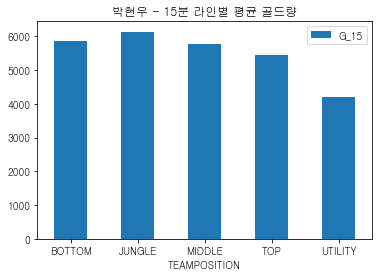

In [63]:
g15.plot.bar(x='TEAMPOSITION', y='G_15', rot=0, title='박현우 - 15분 라인별 평균 골드량')